C:\Users\jpman\anaconda3\lib\site-packages\nbformat\__init__.py:92: MissingIDFieldWarning: Code cell is missing an id field, this will become a hard error in future nbformat versions. You may want to use `normalize()` on your notebooks before validations (available since nbformat 5.1.4). Previous versions of nbformat are fixing this issue transparently, and will stop doing so in the future.
  validate(nb)
C:\Users\jpman\anaconda3\lib\site-packages\nbformat\__init__.py:92: MissingIDFieldWarning: Code cell is missing an id field, this will become a hard error in future nbformat versions. You may want to use `normalize()` on your notebooks before validations (available since nbformat 5.1.4). Previous versions of nbformat are fixing this issue transparently, and will stop doing so in the future.
  validate(nb)
C:\Users\jpman\anaconda3\lib\site-packages\nbformat\__init__.py:92: MissingIDFieldWarning: Code cell is missing an id field, this will become a hard error in future nbformat versions

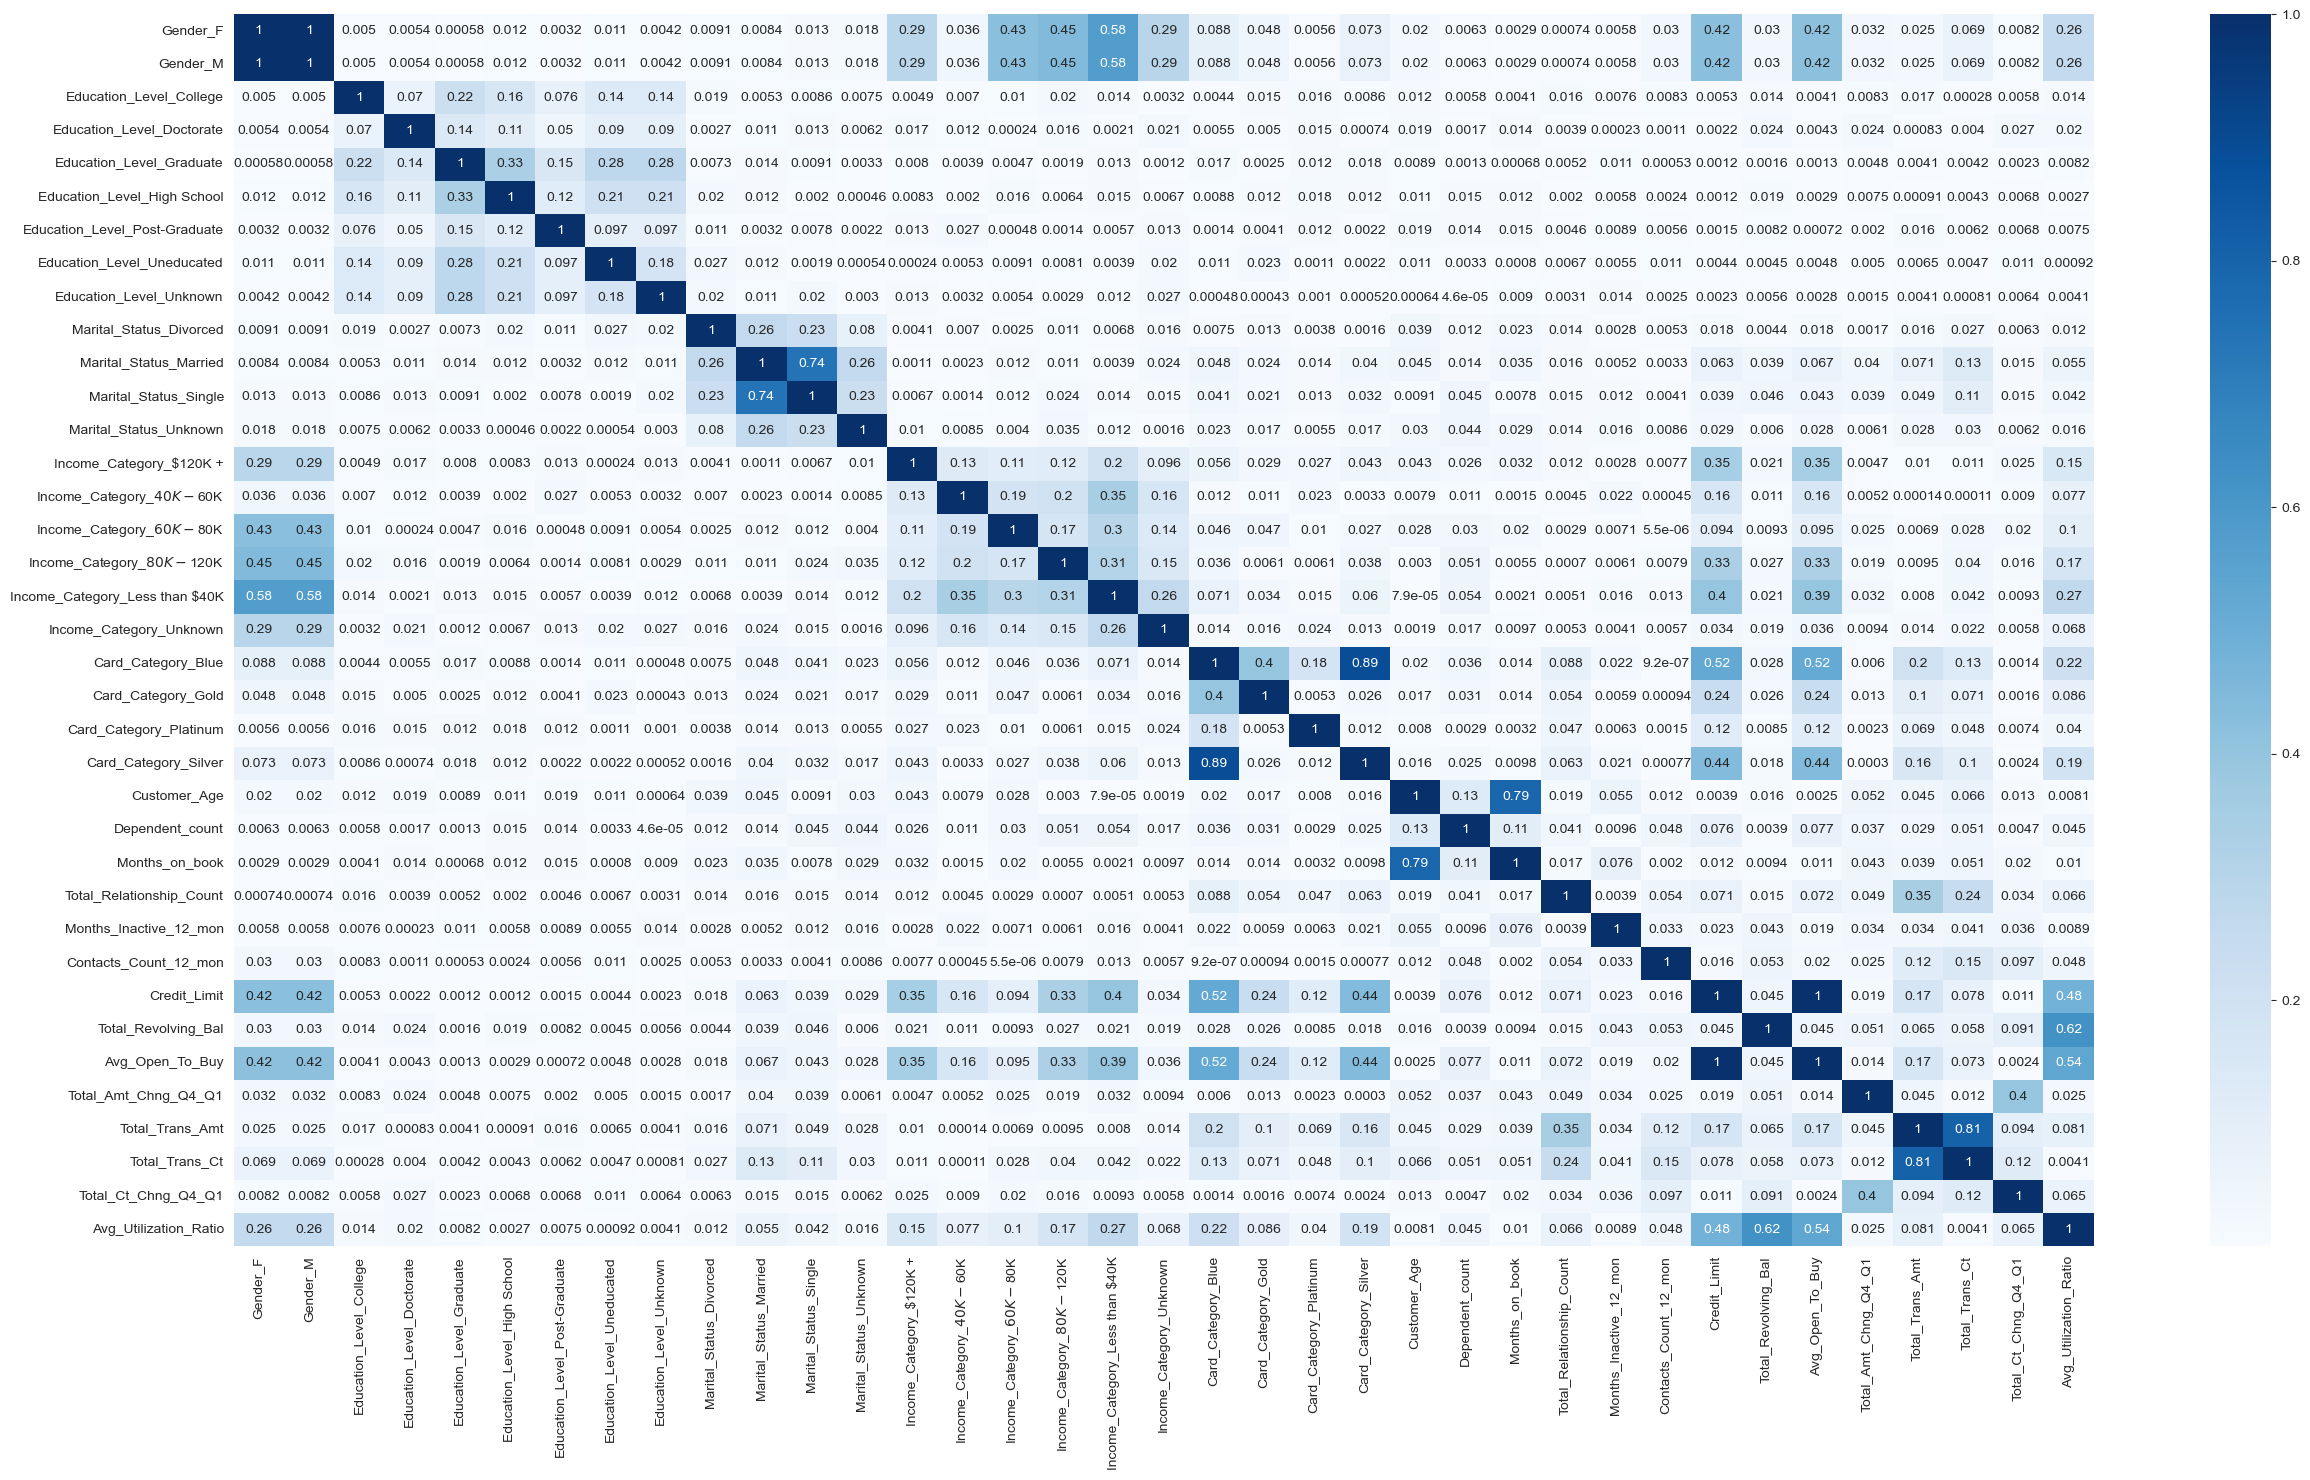

In [9]:
%run imp_and_func.ipynb
%run data_acquisition.ipynb
%run transf_datos.ipynb

## MODELOS BASE

Vamos a usar 3 tipos de modelos de clasificacion. Y van a ser evaluados a travez de varias metricas en conjunto. Se considero utilizar como valor de comparacion la metrica roc_auc, pero igualmente se vera el resultado de el reporte de clasificacion y una matriz de confusion. 

In [10]:
set_train = [X_train_enc,X_train_enc1,X_train_enc2,X_train_enc3] 
set_test = [X_test_enc,X_test_enc1,X_test_enc2,X_test_enc3]
nombre_datos = ['OHE + OrdinalEncoder(MinMaxScaler) | enc',
                'Only OHE | enc1',
                'OHE + Ordinal + resto(MinMaxScaler) | enc2',
                'OHE(sin drop=first) | enc3']

### LogisticRegression

In [11]:
log_reg = LogisticRegression(max_iter=800,
                             n_jobs=-1)
res_log_reg = pd.DataFrame(columns=['Datos usados','ROC_AUC'])

for i,j,k in zip(set_train,set_test,nombre_datos):
  log_reg.fit(i,y_train)
  y_pred_LR = log_reg.predict(j)
  res_log_reg.loc[len(res_log_reg)] = [k,roc_auc_score(y_test,y_pred_LR)]

res_log_reg.sort_values('ROC_AUC',ascending=False)

,Datos usados,ROC_AUC
1,Only OHE | enc1,0.713358
0,OHE + OrdinalEncoder(MinMaxScaler) | enc,0.710212
2,OHE + Ordinal + resto(MinMaxScaler) | enc2,0.706047
3,OHE(sin drop=first) | enc3,0.659011




> Mejor resultado LogisticRegression


In [12]:
log_reg.fit(X_train_enc1,y_train)
y_pred_LR = log_reg.predict(X_test_enc1)

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1701
           1       0.73      0.46      0.56       325

    accuracy                           0.89      2026
   macro avg       0.82      0.71      0.75      2026
weighted avg       0.88      0.89      0.88      2026



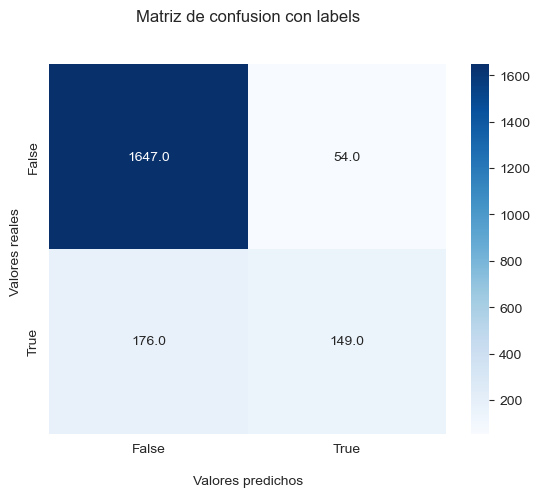

None
Metrica seleccionada para evaular ROC_AUC: 0.7133577533577534


In [13]:
print(classification_report(y_test, y_pred_LR))
print(mat_conf(y_test,y_pred_LR))
print(f'Metrica seleccionada para evaular ROC_AUC: {roc_auc_score(y_test,y_pred_LR)}')

### KNeighborsClassifier

In [14]:
knn = KNeighborsClassifier(n_neighbors=9)
res_knn = pd.DataFrame(columns=['Datos usados','ROC_AUC'])

for i,j,k in zip(set_train,set_test,nombre_datos):
  knn.fit(i,y_train)
  y_pred_knn = knn.predict(j)
  res_knn.loc[len(res_knn)] = [k,roc_auc_score(y_test,y_pred_knn)]

res_knn.sort_values('ROC_AUC',ascending=False)

,Datos usados,ROC_AUC
3,OHE(sin drop=first) | enc3,0.760894
0,OHE + OrdinalEncoder(MinMaxScaler) | enc,0.755034
1,Only OHE | enc1,0.755034
2,OHE + Ordinal + resto(MinMaxScaler) | enc2,0.575660


> Mejor resultado KNN

In [15]:
knn.fit(X_train_enc3, y_train)
predicciones_knn = knn.predict(X_test_enc3)

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1701
           1       0.74      0.56      0.64       325

    accuracy                           0.90      2026
   macro avg       0.83      0.76      0.79      2026
weighted avg       0.89      0.90      0.89      2026



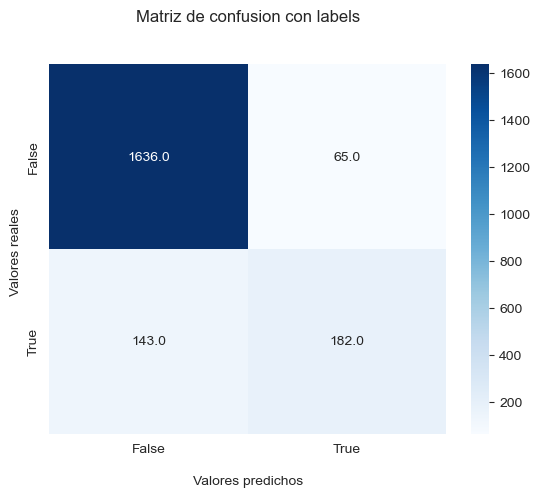

None
Metrica seleccionada para evaular ROC_AUC: 0.7608935920047032


In [16]:
print(classification_report(y_test, predicciones_knn))
print(mat_conf(y_test,predicciones_knn))
print(f'Metrica seleccionada para evaular ROC_AUC: {roc_auc_score(y_test,predicciones_knn)}')

### RandomForestClassifier

In [17]:
clf = RandomForestClassifier(n_estimators = 100,
                             max_depth=5, 
                             random_state=0,
                             criterion = 'gini')

res_clf = pd.DataFrame(columns=['Datos usados','ROC_AUC'])

for i,j,k in zip(set_train,set_test,nombre_datos):
  clf.fit(i,y_train)
  y_pred_clf = clf.predict(j)
  res_clf.loc[len(res_clf)] = [k,roc_auc_score(y_test,y_pred_clf)]

res_clf.sort_values('ROC_AUC',ascending=False)

,Datos usados,ROC_AUC
0,OHE + OrdinalEncoder(MinMaxScaler) | enc,0.753171
1,Only OHE | enc1,0.722920
2,OHE + Ordinal + resto(MinMaxScaler) | enc2,0.721088
3,OHE(sin drop=first) | enc3,0.654865


> Mejor resultado RandomForestClassifier

In [18]:
clf.fit(X_train_enc, y_train)
y_pred_RFC = clf.predict(X_test_enc)

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1701
           1       0.90      0.52      0.66       325

    accuracy                           0.91      2026
   macro avg       0.91      0.75      0.80      2026
weighted avg       0.91      0.91      0.90      2026



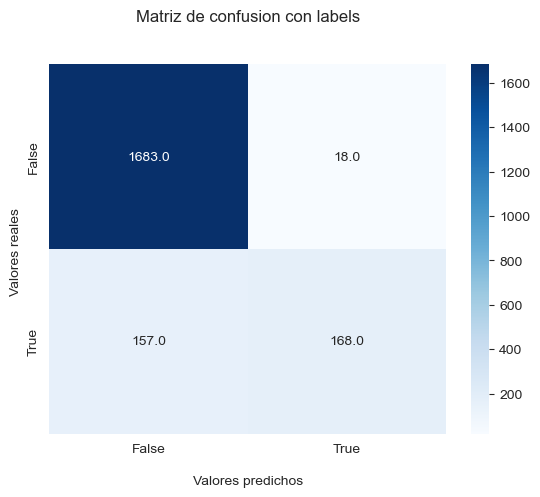

None
Metrica seleccionada para evaular ROC_AUC: 0.7531705331705333


In [19]:
print(classification_report(y_test, y_pred_RFC))
print(mat_conf(y_test,y_pred_RFC))
print(f'Metrica seleccionada para evaular ROC_AUC: {roc_auc_score(y_test,y_pred_RFC)}')

### Conclusiones modelos base

Se usaron tres tipos de modelos para clasificacion. De los cuales obtuvimos diferentes resultados solo cambiando el conjunto de train. Es decir que no se modifciaron los hiperparametros y sieempre se trabajo con el mismo modelo base

> El mejor resultado, en funcion de la metrica seleccionada para evaluarlos, fue el caso de un KNClassifieer usando el set de datos de train modificado con un OHE sin parametro de drop='first' ya que se seleccionaron manualmente que columnas quitar, en funcion de la correlacion que tuvieran. Se uso un criterio de quitar todas aquellas columnas que tuvieran mas de 0.8 de correlacion


## Estandarizacion de datos


Para algunos modelos como Logistic Regression, puede ser util tener los datos estandarizados. Para ello, vamos a intentar hacer algunos test de hipotesis para definir si las variables tengan una distribucion normal, vamos a estandarizarlos mediante un StandarScaler y en caso de que no tengan una distribucion normal, los vamos a estandarizar mediante un RobusScaler

In [20]:
col_a_estandarizar = set(X_train.columns)-set(['Gender','Marital_Status'])  # Quito las columnas que tendran el label encoder

In [21]:
#seleccion de columnas normalizadas
normal_cols = []

#loop en todas las columnas del x_train
for col in col_a_estandarizar:

  #calculo de D'Agostino's K-squared test
  k2, p_value = stats.normaltest(X_train_enc[col])
  #chequeo de si p-value es mayor a 0.05 es distribucion normal
  if p_value > 0.05:
    normal_cols.append(col)
  
  #print de todas las variables con su valor
  print(f"columna {col} ---- Estadístico = {k2}, p-value = {p_value}")

#seleccion de las variables que no estan en normal,  nos daran el resto de columnas no seleccionadas
#conjunto  de todas las columnas menos conjunto de las columnas normalizadas = resto de columnas a estudiar
not_stander = list(set(X_train_enc.columns) - set(normal_cols))

columna Education_Level ---- Estadístico = 1321.963859978571, p-value = 8.693510197602946e-288
columna Avg_Utilization_Ratio ---- Estadístico = 1219.2779056241732, p-value = 1.7265010246566906e-265
columna Total_Amt_Chng_Q4_Q1 ---- Estadístico = 3587.25473866226, p-value = 0.0
columna Months_on_book ---- Estadístico = 54.19613093547096, p-value = 1.7039611829573818e-12
columna Customer_Age ---- Estadístico = 38.41160546539957, p-value = 4.560640637082243e-09
columna Dependent_count ---- Estadístico = 423.58309634607036, p-value = 1.0473680333724518e-92
columna Income_Category ---- Estadístico = 1342.0380995995956, p-value = 3.8030270984392955e-292
columna Credit_Limit ---- Estadístico = 2251.540983943356, p-value = 0.0
columna Total_Revolving_Bal ---- Estadístico = 4823.2046341608175, p-value = 0.0
columna Avg_Open_To_Buy ---- Estadístico = 2242.852904635994, p-value = 0.0
columna Total_Relationship_Count ---- Estadístico = 2026.998644004482, p-value = 0.0
columna Total_Trans_Ct ---- E

In [22]:
normal_cols

['Contacts_Count_12_mon']

In [23]:
not_stander

['Education_Level',
 'Marital_Status_Single',
 'Avg_Utilization_Ratio',
 'Total_Amt_Chng_Q4_Q1',
 'Months_on_book',
 'Customer_Age',
 'Gender_M',
 'Dependent_count',
 'Income_Category',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Relationship_Count',
 'Total_Trans_Ct',
 'Months_Inactive_12_mon',
 'Card_Category',
 'Marital_Status_Married',
 'Total_Trans_Amt',
 'Marital_Status_Unknown',
 'Total_Ct_Chng_Q4_Q1']

In [24]:
X_train_t3 = X_train_enc.copy()
X_test_t3 = X_test_enc.copy()

In [25]:
#proceso de transformacion en X_train

#standarizacion es el z-score utilizado para variables ya con distribucion normal
sc = StandardScaler()
X_train_t3[normal_cols] = sc.fit_transform(X_train_t3[normal_cols])

#utilizacion para cambiar el valor con una distribucion mas desconocida
rs = RobustScaler()
X_train_t3[not_stander] = rs.fit_transform(X_train_t3[not_stander])



In [26]:
#proceso de transformacion en X_test

#standarizacion es el z-score utilizado para variables ya con distribucion normal
sc = StandardScaler()
X_test_t3[normal_cols] = sc.fit_transform(X_test_t3[normal_cols])

#utilizacion para cambiar el valor con una distribucion mas desconocida
rs = RobustScaler()
X_test_t3[not_stander] = rs.fit_transform(X_test_t3[not_stander])

In [27]:
X_train_t3

,Education_Level,Income_Category,Card_Category,Gender_M,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
6207,1.000000,-0.5,0.0,0.0,1.0,0.0,0.0,-0.818182,0.5,-1.125,0.0,0.0,-2.208556,-0.368504,-0.388446,-0.322648,0.181818,0.284559,0.166667,1.886076,0.631250
9099,0.000000,0.0,0.0,1.0,0.0,1.0,0.0,-0.272727,0.5,-0.125,0.5,1.0,-0.410414,0.179254,-0.322045,0.210854,1.034632,0.378899,-0.305556,-0.223629,-0.095833
1957,-0.666667,-0.5,0.0,1.0,1.0,0.0,0.0,-1.272727,-0.5,0.000,0.5,1.0,0.488657,0.181614,0.164675,0.127100,0.506494,-0.852522,-0.972222,0.767932,0.154167
3383,-0.666667,0.5,0.0,1.0,1.0,0.0,0.0,0.000000,1.0,-0.875,1.0,1.0,-0.410414,0.138541,0.755644,-0.020322,-0.519481,0.010012,0.222222,-0.295359,0.510417
2206,0.666667,-0.5,0.0,0.0,1.0,0.0,0.0,-1.000000,0.0,-1.750,0.0,1.0,0.488657,-0.238022,0.382470,-0.329144,0.294372,-0.613400,-0.500000,-1.092827,1.147917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6829,0.666667,-0.5,0.0,0.0,0.0,1.0,0.0,0.363636,-1.0,0.875,1.0,2.0,-0.410414,-0.223153,0.446215,-0.325620,-0.467532,0.234501,-0.055556,-0.139241,1.152083
268,0.666667,0.0,0.0,0.0,1.0,0.0,0.0,1.636364,-1.0,2.125,-1.5,1.0,0.488657,-0.142554,-0.844622,-0.017033,1.233766,-1.125144,-1.361111,-1.329114,-0.364583
5191,0.666667,-1.0,0.0,0.0,0.0,0.0,0.0,0.636364,0.5,0.000,0.0,1.0,3.185870,0.398631,-0.844622,0.521673,-0.800866,-0.621101,-0.694444,-1.637131,-0.364583
3380,0.000000,-0.5,0.0,0.0,1.0,0.0,0.0,-0.636364,-0.5,0.000,-0.5,1.0,-1.309485,-0.244395,0.005976,-0.268883,-0.800866,-0.762418,-0.916667,-0.341772,0.706250


In [28]:
X_train_t3.describe().T

,count,mean,std,min,25%,50%,75%,max
Education_Level,8101.0,1.552483e-01,0.573342,-0.666667,-0.333333,0.000000,0.666667,1.333333
Income_Category,8101.0,3.715591e-02,0.733991,-1.000000,-0.500000,0.000000,0.500000,1.500000
Card_Category,8101.0,2.859729e-02,0.113395,0.000000,0.000000,0.000000,0.000000,1.000000
Gender_M,8101.0,4.688310e-01,0.499058,0.000000,0.000000,0.000000,1.000000,1.000000
Marital_Status_Married,8101.0,4.592026e-01,0.498364,0.000000,0.000000,0.000000,1.000000,1.000000
Marital_Status_Single,8101.0,3.926676e-01,0.488374,0.000000,0.000000,0.000000,1.000000,1.000000
Marital_Status_Unknown,8101.0,7.529935e-02,0.263890,0.000000,0.000000,0.000000,0.000000,1.000000
Customer_Age,8101.0,3.679680e-02,0.732343,-1.818182,-0.454545,0.000000,0.545455,2.454545
Dependent_count,8101.0,1.715220e-01,0.651439,-1.000000,-0.500000,0.000000,0.500000,1.500000
Months_on_book,8101.0,5.709172e-04,1.001273,-2.875000,-0.500000,0.000000,0.500000,2.500000


### LogisticRegression c/datos estandarizados

In [29]:
log_reg_std = LogisticRegression(max_iter=800,n_jobs=-1)
log_reg_std.fit(X_train_t3,y_train)
y_pred_LRstd = log_reg_std.predict(X_test_t3)

In [30]:
print('Resultados LogisticRegression c/variables estandarizadas')
print(classification_report(y_test, y_pred_LRstd))
print(f'roc_auc: {roc_auc_score(y_test,y_pred_LRstd)}')
print('Resultados LogisticRegression c/variables sin estandarizar')
print(classification_report(y_test, y_pred_LR))
print(f'roc_auc: {roc_auc_score(y_test,y_pred_LR)}')

Resultados LogisticRegression c/variables estandarizadas
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1701
           1       0.73      0.58      0.65       325

    accuracy                           0.90      2026
   macro avg       0.83      0.77      0.79      2026
weighted avg       0.89      0.90      0.89      2026

roc_auc: 0.7692425270203048
Resultados LogisticRegression c/variables sin estandarizar
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1701
           1       0.73      0.46      0.56       325

    accuracy                           0.89      2026
   macro avg       0.82      0.71      0.75      2026
weighted avg       0.88      0.89      0.88      2026

roc_auc: 0.7133577533577534


como vemos la estandarizacion de las variables no genero un resultado mejor al que obtuvimos con las variables sin estandarizar.

Queda pendiente analizar si el problema fue el modo en que se estandarizaron o si para este caso no es conveniente hacerlo. 


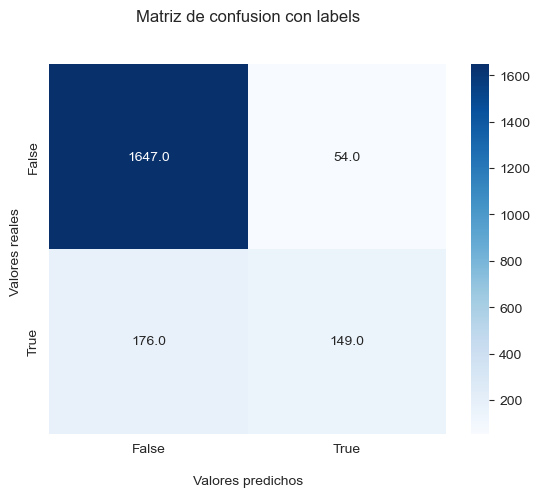

In [31]:
mat_conf(y_test,y_pred_LR)

### KNeighborsClassifier c/datos estandarizados

In [32]:
knn_std = KNeighborsClassifier(n_neighbors=9) # Instanciamos el clasificador k veces es decir k vecinos cercanos
knn_std.fit(X_train_t3, y_train)
predicciones_knn_std = knn_std.predict(X_test_t3)

In [33]:
print('Resultados KNeighborsClassifier c/variables estandarizadas')
print(classification_report(y_test, predicciones_knn_std,zero_division=0))
print(f'roc_auc: {roc_auc_score(y_test,predicciones_knn_std)}')
print('Resultados KNeighborsClassifier c/variables sin estandarizar')
print(classification_report(y_test, predicciones_knn,zero_division=0))
print(f'roc_auc: {roc_auc_score(y_test,predicciones_knn)}')

Resultados KNeighborsClassifier c/variables estandarizadas
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1701
           1       0.84      0.57      0.68       325

    accuracy                           0.91      2026
   macro avg       0.88      0.77      0.82      2026
weighted avg       0.91      0.91      0.91      2026

roc_auc: 0.7746212635101524
Resultados KNeighborsClassifier c/variables sin estandarizar
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1701
           1       0.74      0.56      0.64       325

    accuracy                           0.90      2026
   macro avg       0.83      0.76      0.79      2026
weighted avg       0.89      0.90      0.89      2026

roc_auc: 0.7608935920047032


El resultado mejora, pero no demasiado. 


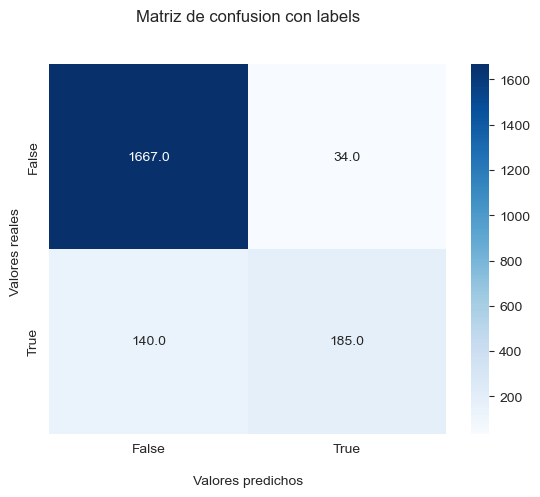

In [34]:
mat_conf(y_test,predicciones_knn_std)

### RandomForestClassifier c/datos estandarizados

In [35]:
clf_std = RandomForestClassifier(n_estimators = 100,
                             max_depth=5, 
                             random_state=0,
                             criterion = 'gini')
clf_std.fit(X_train_t3, y_train)
y_pred_RFCstd = clf_std.predict(X_test_t3)

In [36]:
print('Resultados KNeighborsClassifier c/variables estandarizadas')
print(classification_report(y_test, y_pred_RFCstd,zero_division=0))
print(f'roc_auc: {roc_auc_score(y_test,y_pred_RFCstd)}')
print('Resultados KNeighborsClassifier c/variables sin estandarizar')
print(classification_report(y_test, y_pred_RFC,zero_division=0))
print(f'roc_auc: {roc_auc_score(y_test,y_pred_RFC)}')

Resultados KNeighborsClassifier c/variables estandarizadas
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      1701
           1       0.91      0.53      0.67       325

    accuracy                           0.92      2026
   macro avg       0.91      0.76      0.81      2026
weighted avg       0.92      0.92      0.91      2026

roc_auc: 0.7608628408628408
Resultados KNeighborsClassifier c/variables sin estandarizar
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1701
           1       0.90      0.52      0.66       325

    accuracy                           0.91      2026
   macro avg       0.91      0.75      0.80      2026
weighted avg       0.91      0.91      0.90      2026

roc_auc: 0.7531705331705333


Lo mismo que el modelo anterior. No mejora demasiado el modelo.

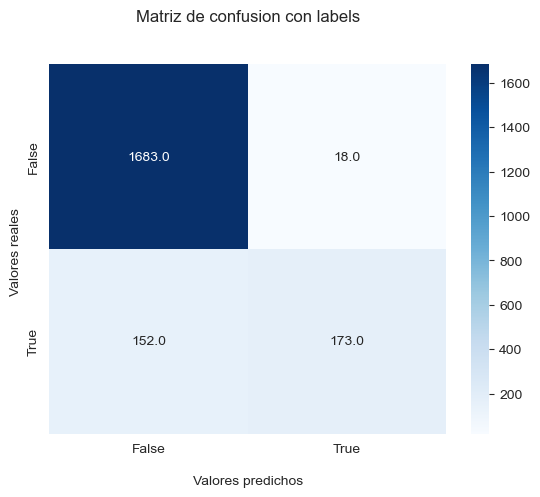

In [37]:
mat_conf(y_test,y_pred_RFCstd)

## PCA

In [38]:
#Importamos la libreria
from sklearn.decomposition import PCA

#Generamos el objeto
model_pca = PCA(n_components = 10)

#Aplicamos pca
X_pca_test=model_pca.fit_transform(X_test_enc)
X_pca_train=model_pca.fit_transform(X_train_enc)

In [39]:
#Variaanza explicada de las componentes
var_explicada_pca = model_pca.explained_variance_ratio_
var_explicada_pca

array([9.31713696e-01, 6.27122718e-02, 5.57220953e-03, 1.06602289e-06,
       6.41085797e-07, 7.58713979e-08, 1.19276294e-08, 9.23104206e-09,
       6.71308968e-09, 5.68145741e-09])

### LogisticRegression

Como al cambiar la cantidad de variables que queremos en el PCA nos da diferentes resultados, vamos a hacer un bucle que pruebe con muchos valores y nos arroje los resultados de c/u

In [40]:
resultados = pd.DataFrame(columns=['cant-variables','accuracy_score','precision_score','recall_score','f1_score','roc_auc_score'])

In [41]:
log_reg_pca = LogisticRegression(max_iter=800,n_jobs=-1)
for i in range(1,15):
  pca = PCA(n_components = i)
  pca.fit(X_train_enc)
  xTest = pca.fit_transform(X_test_enc)
  xTrain = pca.fit_transform(X_train_enc)
  log_reg_pca.fit(xTrain,y_train)
  y_pred_LRpca = log_reg_pca.predict(xTest)
  fila =  pd.DataFrame({'cant-variables':i,
                        'accuracy_score':[accuracy_score(y_test,y_pred_LRpca)],
                        'precision_score':[precision_score(y_test, y_pred_LRpca)],
                        'recall_score':[recall_score(y_test, y_pred_LRpca)],
                        'f1_score':[ f1_score(y_test, y_pred_LRpca)],
                        'roc_auc_score':[ roc_auc_score(y_test,y_pred_LRpca)]})
  resultados = pd.concat([resultados,fila])

C:\Users\jpman\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jpman\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
resultados = resultados.set_index('cant-variables')

In [43]:
resultados.sort_values(by='roc_auc_score',ascending=False).head()

,accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
cant-variables,,,,,
3,0.840573,1.000000,0.006154,0.012232,0.503077
1,0.839585,0.000000,0.000000,0.000000,0.500000
2,0.839585,0.000000,0.000000,0.000000,0.500000
12,0.768509,0.121053,0.070769,0.089320,0.486296
13,0.772952,0.109827,0.058462,0.076305,0.483963


En funcion de esto, vamos a definir que el resultado para un mejor PCA lo ofrece un n_components = 3

In [44]:
log_reg_pca = LogisticRegression(max_iter=800,n_jobs=-1)
pca = PCA(n_components = 3)
pca.fit(X_train_enc)
xTest = pca.transform(X_test_enc)
xTrain = pca.transform(X_train_enc)
log_reg_pca.fit(xTrain,y_train)
y_pred_LRpca = log_reg_pca.predict(xTest)

In [45]:
print('Resultados LogisticRegression c/PCA + mod')
print(classification_report(y_test, y_pred_LRpca))
print(f'roc_auc : {roc_auc_score(y_test, y_pred_LRpca)}')
print('- '*27)
print('Resultados LogisticRegression sin modificar')
print(classification_report(y_test, y_pred_LR))
print(f'roc_auc : {roc_auc_score(y_test, y_pred_LR)}')

Resultados LogisticRegression c/PCA + mod
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1701
           1       1.00      0.00      0.01       325

    accuracy                           0.84      2026
   macro avg       0.92      0.50      0.46      2026
weighted avg       0.87      0.84      0.77      2026

roc_auc : 0.5015384615384615
- - - - - - - - - - - - - - - - - - - - - - - - - - - 
Resultados LogisticRegression sin modificar
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1701
           1       0.73      0.46      0.56       325

    accuracy                           0.89      2026
   macro avg       0.82      0.71      0.75      2026
weighted avg       0.88      0.89      0.88      2026

roc_auc : 0.7133577533577534


El resultado no mejoro

### KNeighborsClassifier

Aca se hizo un bucle parecido al anterior, pero le agregamos la variacion en el hiperparametro n_neighbors

In [46]:
resultados_KNC = pd.DataFrame(columns=['cant-variables','VecinosCercanos','accuracy_score','precision_score','recall_score','f1_score','roc_auc_score'])

In [47]:
for i in range(1,15):
  pca = PCA(n_components = i)
  xTest = pca.fit_transform(X_test_enc)
  xTrain = pca.fit_transform(X_train_enc)
  for k in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(xTrain,y_train)
    y_pred_knn = knn.predict(xTest)
    fila =  pd.DataFrame({'cant-variables':i,
                          'VecinosCercanos':k,
                          'accuracy_score':[accuracy_score(y_test,y_pred_knn)],
                          'precision_score':[precision_score(y_test, y_pred_knn)],
                          'recall_score':[recall_score(y_test, y_pred_knn)],
                          'f1_score':[ f1_score(y_test, y_pred_knn)],
                          'roc_auc_score':[ roc_auc_score(y_test,y_pred_knn)]})
    resultados_KNC = pd.concat([resultados_KNC,fila],ignore_index=True)

In [48]:
resultados_KNC.sort_values(by='roc_auc_score',ascending=False).head(20)

,cant-variables,VecinosCercanos,accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
78,6,9,0.902764,0.775862,0.553846,0.646320,0.761638
106,8,9,0.902764,0.775862,0.553846,0.646320,0.761638
148,11,9,0.902764,0.775862,0.553846,0.646320,0.761638
64,5,9,0.902764,0.775862,0.553846,0.646320,0.761638
92,7,9,0.902764,0.775862,0.553846,0.646320,0.761638
50,4,9,0.902764,0.775862,0.553846,0.646320,0.761638
134,10,9,0.902764,0.775862,0.553846,0.646320,0.761638
176,13,9,0.902764,0.775862,0.553846,0.646320,0.761638
190,14,9,0.902764,0.775862,0.553846,0.646320,0.761638
162,12,9,0.902764,0.775862,0.553846,0.646320,0.761638


En funcion de esto podemos determinar que la mejor opcion podrian ser varias en funcion del ROC_AUC. Para el parametro de n_neighbors, vamos a tener que usar 9. Pero para el PCA podemos usar diferente cantidad de variables y todas ofrecen un resultado parecido.

In [49]:
knn_mod = KNeighborsClassifier(n_neighbors=9)
pca = PCA(n_components = 6)
xTest = pca.fit_transform(X_test_enc)
xTrain = pca.fit_transform(X_train_enc)
knn_mod.fit(xTrain, y_train)
predicciones_knn_mod = knn_mod.predict(xTest)

In [50]:
print('Resultados KNeighborsClassifier c/PCA + mod')
print(classification_report(y_test, predicciones_knn_mod,zero_division=0))
print(f'roc_auc : {roc_auc_score(y_test, predicciones_knn_mod)}')
print('- '*27)
print('Resultados KNeighborsClassifier sin modificaciones')
print(classification_report(y_test, predicciones_knn,zero_division=0))
print(f'roc_auc : {roc_auc_score(y_test, predicciones_knn)}')

Resultados KNeighborsClassifier c/PCA + mod
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1701
           1       0.78      0.55      0.65       325

    accuracy                           0.90      2026
   macro avg       0.85      0.76      0.79      2026
weighted avg       0.90      0.90      0.90      2026

roc_auc : 0.7616379505268395
- - - - - - - - - - - - - - - - - - - - - - - - - - - 
Resultados KNeighborsClassifier sin modificaciones
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1701
           1       0.74      0.56      0.64       325

    accuracy                           0.90      2026
   macro avg       0.83      0.76      0.79      2026
weighted avg       0.89      0.90      0.89      2026

roc_auc : 0.7608935920047032


El resultado mejora muy poco. Pero puede ser util reducir la dimensionalidad

### RandomForestClassifier

In [51]:
resultados_rfc = pd.DataFrame(columns=['cant-variables','accuracy_score','precision_score','recall_score','f1_score','roc_auc_score'])

In [52]:
RFC_pca = RandomForestClassifier(n_estimators = 100,
                             max_depth=5, 
                             random_state=0,
                             criterion = 'gini')
for i in range(1,15):
  pca = PCA(n_components = i)
  pca.fit(X_train_enc)
  xTest = pca.fit_transform(X_test_enc)
  xTrain = pca.fit_transform(X_train_enc)
  RFC_pca.fit(xTrain,y_train)
  y_pred_RFCpca = RFC_pca.predict(xTest)
  fila =  pd.DataFrame({'cant-variables':i,
                        'accuracy_score':[accuracy_score(y_test,y_pred_RFCpca)],
                        'precision_score':[precision_score(y_test, y_pred_RFCpca)],
                        'recall_score':[recall_score(y_test, y_pred_RFCpca)],
                        'f1_score':[ f1_score(y_test, y_pred_RFCpca)],
                        'roc_auc_score':[ roc_auc_score(y_test,y_pred_RFCpca)]})
  resultados_rfc = pd.concat([resultados_rfc,fila])

In [53]:
resultados_rfc = resultados_rfc.set_index('cant-variables')

In [54]:
resultados_rfc.sort_values(by='roc_auc_score',ascending=False).head()

,accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
cant-variables,,,,,
3,0.888450,0.827815,0.384615,0.525210,0.684665
2,0.856861,0.615894,0.286154,0.390756,0.626028
13,0.831194,0.242424,0.024615,0.044693,0.504959
1,0.834650,0.272727,0.018462,0.034582,0.504528
14,0.814413,0.119403,0.024615,0.040816,0.494965


Resultados usando el PCA con un n_components = 3

In [55]:
RFC_pca = RandomForestClassifier(n_estimators = 100,
                             max_depth=5, 
                             random_state=0,
                             criterion = 'gini')
pca = PCA(n_components = 3)
pca.fit(X_train_enc)
xTest = pca.transform(X_test_enc)
xTrain = pca.transform(X_train_enc)
RFC_pca.fit(xTrain,y_train)
y_pred_RFCpca = RFC_pca.predict(xTest)

In [56]:
print('Resultados RandomForestClassifier c/PCA')
print(classification_report(y_test, y_pred_RFCpca))
print(f'roc_auc : {roc_auc_score(y_test, y_pred_RFCpca)}')
print('- '*27)
print('Resultados RandomForestClassifier sin modificar')
print(classification_report(y_test, y_pred_RFC))
print(f'roc_auc : {roc_auc_score(y_test, y_pred_RFC)}')

Resultados RandomForestClassifier c/PCA
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1701
           1       0.80      0.44      0.57       325

    accuracy                           0.89      2026
   macro avg       0.85      0.71      0.75      2026
weighted avg       0.88      0.89      0.88      2026

roc_auc : 0.7106625062180618
- - - - - - - - - - - - - - - - - - - - - - - - - - - 
Resultados RandomForestClassifier sin modificar
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1701
           1       0.90      0.52      0.66       325

    accuracy                           0.91      2026
   macro avg       0.91      0.75      0.80      2026
weighted avg       0.91      0.91      0.90      2026

roc_auc : 0.7531705331705333


No mejora el resultado

## Analisis de outliers

In [57]:
from sklearn.ensemble import IsolationForest

In [58]:
# identificar outliers en el dataset de train
iso = IsolationForest(contamination=0.1, random_state=42) # contamination = proporcion de outliers esperada
yhat = iso.fit_predict(X_train_enc)

# seleccionar todas las filas que no son outliers
mask = yhat != -1 # filtro


C:\Users\jpman\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [59]:
X_prueba , y_prueba = X_train_enc[mask],y_train[mask]

In [60]:
X_prueba.shape

(7291, 21)

In [61]:
knn_out = KNeighborsClassifier(n_neighbors=9)
knn_out.fit(X_prueba,y_prueba)
knn_out_pred = knn_out.predict(X_test_enc)
print(f'ROC_AUC para modelo con tratamiento de outliers: {roc_auc_score(y_test,knn_out_pred)}')

ROC_AUC para modelo con tratamiento de outliers: 0.7386985031429476


En el modelo original, el roc_auc fue 0.75, por lo tanto el modelo no mejoro. Solo empeoro. Quiza deberia hacerse un tratamiento puntual de outliers solo en algunas variables. Pero esto deberia ser investigado mas a fondo.

## Feature Selection con VarianceThreshold


Voy a probar utilizar diferentes metodos de seleeccion de caracteristicas para ver si podemos mantener la precision del modelo eliminando variables que no aporten nada al entrenamiento. 


In [62]:
from sklearn.feature_selection import VarianceThreshold

In [63]:
# Selección de características utilizando VarianceThreshold seleccionando un umbral de 0.9
vt = VarianceThreshold(threshold=0.9)
X_tr_vt = vt.fit_transform(X_train_enc)
X_ts_vt = vt.transform(X_test_enc)

In [64]:
X_train_enc.shape

(8101, 21)

In [65]:
pd.DataFrame(X_tr_vt).shape

(8101, 11)

### LogisticRegression c/FeatureSelection por VarianceThreshold

In [66]:
log_reg_vt = LogisticRegression(max_iter=800,n_jobs=-1)
log_reg_vt.fit(X_tr_vt,y_train)
y_pred_LRvt = log_reg_vt.predict(X_ts_vt)

In [67]:
print('Resultados LogisticRegression c/variables reducidas')
print(classification_report(y_test, y_pred_LRvt))
print(f'roc_auc : {roc_auc_score(y_test,y_pred_LRvt)}')
print('- '*27)
print('Resultados LogisticRegression modelo base')
print(classification_report(y_test, y_pred_LR))
print(f'roc_auc : {roc_auc_score(y_test,y_pred_LR)}')

Resultados LogisticRegression c/variables reducidas
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1701
           1       0.74      0.45      0.56       325

    accuracy                           0.89      2026
   macro avg       0.82      0.71      0.75      2026
weighted avg       0.88      0.89      0.87      2026

roc_auc : 0.7096242029575364
- - - - - - - - - - - - - - - - - - - - - - - - - - - 
Resultados LogisticRegression modelo base
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1701
           1       0.73      0.46      0.56       325

    accuracy                           0.89      2026
   macro avg       0.82      0.71      0.75      2026
weighted avg       0.88      0.89      0.88      2026

roc_auc : 0.7133577533577534


Podemos ver que utilizando un umbral de 0.9 las metricas mejoran muy poco, pero reducimos la dimencionalidad de 21 a 11.

### KNeighborsClassifier c/FeatureSelection por VarianceThreshold

In [68]:
knn_vt = KNeighborsClassifier(n_neighbors=9) # Instanciamos el clasificador k veces es decir k vecinos cercanos
knn_vt.fit(X_tr_vt, y_train)
predicciones_knn_vt = knn_vt.predict(X_ts_vt)

In [69]:
print('Resultados KNeighborsClassifier c/variables reducidas')
print(classification_report(y_test, predicciones_knn_vt,zero_division=0))
print(f'roc_auc : {roc_auc_score(y_test,predicciones_knn_vt)}')
print('- '*27)
print('Resultados KNeighborsClassifier modelo base')
print(classification_report(y_test, predicciones_knn,zero_division=0))
print(f'roc_auc : {roc_auc_score(y_test,predicciones_knn)}')

Resultados KNeighborsClassifier c/variables reducidas
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1701
           1       0.74      0.55      0.63       325

    accuracy                           0.90      2026
   macro avg       0.83      0.76      0.78      2026
weighted avg       0.89      0.90      0.89      2026

roc_auc : 0.7550336905892461
- - - - - - - - - - - - - - - - - - - - - - - - - - - 
Resultados KNeighborsClassifier modelo base
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1701
           1       0.74      0.56      0.64       325

    accuracy                           0.90      2026
   macro avg       0.83      0.76      0.79      2026
weighted avg       0.89      0.90      0.89      2026

roc_auc : 0.7608935920047032


La reduccion de dimensiones no mejora el resultado del modelo en el caso de un KNeighoborsClassifier pero quitamos 10 variables

### RandomForestClassifier c/FeatureSelection por VarianceThreshold

In [70]:
clf_vt = RandomForestClassifier(n_estimators = 100,
                             max_depth=5, 
                             random_state=0,
                             criterion = 'gini')
clf_vt.fit(X_tr_vt, y_train)
y_pred_RFCvt = clf_vt.predict(X_ts_vt)

In [71]:
print('Resultados RandomForestClassifier c/variables reducidas')
print(classification_report(y_test, y_pred_RFCvt,zero_division=0))
print(f'roc_auc : {roc_auc_score(y_test,y_pred_RFCvt)}')
print('- '*27)
print('Resultados RandomForestClassifier modelo base')
print(classification_report(y_test, y_pred_RFC,zero_division=0))
print(f'roc_auc : {roc_auc_score(y_test,y_pred_RFC)}')

Resultados RandomForestClassifier c/variables reducidas
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1701
           1       0.89      0.60      0.72       325

    accuracy                           0.92      2026
   macro avg       0.91      0.79      0.84      2026
weighted avg       0.92      0.92      0.92      2026

roc_auc : 0.7926513815402705
- - - - - - - - - - - - - - - - - - - - - - - - - - - 
Resultados RandomForestClassifier modelo base
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1701
           1       0.90      0.52      0.66       325

    accuracy                           0.91      2026
   macro avg       0.91      0.75      0.80      2026
weighted avg       0.91      0.91      0.90      2026

roc_auc : 0.7531705331705333


Vemos que algunas metricas se reducen muy poco, sin embargo el roc_auc aumenta por lo que el modelo mejora su desempeño y reduce la dimensionalidad.

## Feature Selection con SelectKBest

In [72]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [73]:
selector = SelectKBest(score_func=f_classif, k=7)
X_tr_sKB = selector.fit_transform(X_train_enc, y_train)
X_ts_sKB = selector.transform(X_test_enc)

In [74]:
X_train_enc.shape

(8101, 21)

In [75]:
pd.DataFrame(X_tr_sKB).shape

(8101, 7)

Podemos ver que selecciono las mejores 7 variables

### LogisticRegression c/FeatureSelection por SelectKBest

In [76]:
log_reg_sKB = LogisticRegression(max_iter=800,n_jobs=-1)
log_reg_sKB.fit(X_tr_sKB,y_train)
y_pred_LRsKB = log_reg_sKB.predict(X_ts_sKB)

In [77]:
print('Resultados LogisticRegression c/variables reducidas')
print(classification_report(y_test, y_pred_LRsKB))
print(f'roc_auc : {roc_auc_score(y_test,y_pred_LRsKB)}')
print('- '*27)
print('Resultados LogisticRegression modelo base')
print(classification_report(y_test, y_pred_LR))
print(f'roc_auc : {roc_auc_score(y_test,y_pred_LR)}')

Resultados LogisticRegression c/variables reducidas
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      1701
           1       0.71      0.47      0.57       325

    accuracy                           0.88      2026
   macro avg       0.81      0.72      0.75      2026
weighted avg       0.87      0.88      0.87      2026

roc_auc : 0.7181106136661692
- - - - - - - - - - - - - - - - - - - - - - - - - - - 
Resultados LogisticRegression modelo base
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1701
           1       0.73      0.46      0.56       325

    accuracy                           0.89      2026
   macro avg       0.82      0.71      0.75      2026
weighted avg       0.88      0.89      0.88      2026

roc_auc : 0.7133577533577534


Podemos ver que reduciendo la dimensionalidad en un 66% (ya que quitamos 2/3 de las variables) el rendimiento del modelo en funcion de la roc_auc mejoro un poco

### KNeighborsClassifier c/FeatureSelection por SelectKBest

In [78]:
knn_sKB = KNeighborsClassifier(n_neighbors=9) # Instanciamos el clasificador k veces es decir k vecinos cercanos
knn_sKB.fit(X_tr_sKB, y_train)
predicciones_knn_sKB = knn_sKB.predict(X_ts_sKB)

In [79]:
print('Resultados KNeighborsClassifier c/variables reducidas')
print(classification_report(y_test, predicciones_knn_sKB,zero_division=0))
print(f'roc_auc : {roc_auc_score(y_test,predicciones_knn_sKB)}')
print('- '*27)
print('Resultados KNeighborsClassifier modelo base')
print(classification_report(y_test, predicciones_knn,zero_division=0))
print(f'roc_auc : {roc_auc_score(y_test,predicciones_knn)}')

Resultados KNeighborsClassifier c/variables reducidas
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1701
           1       0.80      0.65      0.72       325

    accuracy                           0.92      2026
   macro avg       0.87      0.81      0.84      2026
weighted avg       0.91      0.92      0.91      2026

roc_auc : 0.8105747750192194
- - - - - - - - - - - - - - - - - - - - - - - - - - - 
Resultados KNeighborsClassifier modelo base
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1701
           1       0.74      0.56      0.64       325

    accuracy                           0.90      2026
   macro avg       0.83      0.76      0.79      2026
weighted avg       0.89      0.90      0.89      2026

roc_auc : 0.7608935920047032


La reduccion de dimensiones mediante SelectKBest MEJORA el resultado del modelo en el caso de un KNeighoborsClassifier. 
Ademas de reducir en un 66% la cantidad de variables, aumentan las metricas de evaluacion del modelo.

### RandomForestClassifier c/FeatureSelection por SelectKBest

In [80]:
clf_sKB = RandomForestClassifier(n_estimators = 100,
                             max_depth=5, 
                             random_state=0,
                             criterion = 'gini')
clf_sKB.fit(X_tr_sKB, y_train)
y_pred_RFCsKB = clf_sKB.predict(X_ts_sKB)

In [81]:
print('Resultados RandomForestClassifier c/variables reducidas')
print(classification_report(y_test, y_pred_RFCsKB,zero_division=0))
print(f'roc_auc : {roc_auc_score(y_test,y_pred_RFCsKB)}')
print('- '*27)
print('Resultados RandomForestClassifier modelo base')
print(classification_report(y_test, y_pred_RFC,zero_division=0))
print(f'roc_auc : {roc_auc_score(y_test,y_pred_RFC)}')

Resultados RandomForestClassifier c/variables reducidas
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      1701
           1       0.88      0.54      0.67       325

    accuracy                           0.92      2026
   macro avg       0.90      0.76      0.81      2026
weighted avg       0.91      0.92      0.91      2026

roc_auc : 0.7640085017862795
- - - - - - - - - - - - - - - - - - - - - - - - - - - 
Resultados RandomForestClassifier modelo base
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1701
           1       0.90      0.52      0.66       325

    accuracy                           0.91      2026
   macro avg       0.91      0.75      0.80      2026
weighted avg       0.91      0.91      0.90      2026

roc_auc : 0.7531705331705333


Vemos que algunas metricas se mantienen, pero el modelo sigue conservando su buen desempeño considerando que quitamos el 66% de los datos. la metrica de evaluacion aumenta un poco

> NOTA: Podemos ver que el modelo de KNC mejoro notablemente el rendimiento en cuanto al auc_roc, llegando a un 0.81.

## Cross Validation


Para hacer cross validation vamos a usar los modelos bases que podemos encontrar en la seccion MODELOS BASE

In [82]:
cv_log_reg = cross_val_score(log_reg,X_train_enc,y_train,cv=10)

In [83]:
cv_log_reg

array([0.8865598 , 0.88765432, 0.88395062, 0.90493827, 0.89259259,
       0.90123457, 0.88765432, 0.87654321, 0.89876543, 0.8962963 ])

En lugar de usar ese metodo, busque uno que habiamos usado con el primer profesor, que nos enseño a hacer el stratiedKFold, y como ir uniendo todo con el cross_validate.

A continuacion esta el resultado.

In [84]:
skf = StratifiedKFold(n_splits=10,
                      shuffle=True, 
                      random_state=4)

In [85]:
skf2 = StratifiedKFold(n_splits=10)

### Cross Validation con LogisticRegression

In [86]:
skf_log_reg = cross_validate(log_reg,
                             X_train_enc,
                             y_train,
                             scoring = ['accuracy','roc_auc','precision','recall','f1'],
                             return_train_score=True,
                             cv = skf)

In [87]:
# funcion propioa para obtener el train_score en un dataframe. Muestra mucha
# informacion de cada uno de los Fold pero se puede filtrar solo para ver
# los de train o los de test
resultados_train_scores_cv(skf_log_reg)

                     0      1      2      3      4      5      6      7  \
fit_time         1.808  0.964  2.054  0.991  1.071  0.752  0.922  1.116   
score_time       0.008  0.008  0.008  0.008  0.008  0.008  0.008  0.008   
test_accuracy    0.904  0.896  0.883  0.902  0.893  0.891  0.875  0.894   
train_accuracy   0.898  0.892  0.900  0.891  0.892  0.891  0.894  0.892   
test_roc_auc     0.924  0.910  0.886  0.909  0.906  0.900  0.907  0.911   
train_roc_auc    0.912  0.910  0.913  0.910  0.910  0.905  0.910  0.910   
test_precision   0.757  0.767  0.701  0.763  0.726  0.739  0.636  0.734   
train_precision  0.758  0.732  0.758  0.728  0.732  0.734  0.742  0.734   
test_recall      0.595  0.508  0.469  0.569  0.531  0.500  0.523  0.531   
train_recall     0.538  0.513  0.555  0.516  0.514  0.502  0.526  0.515   
test_f1          0.667  0.611  0.562  0.652  0.613  0.596  0.574  0.616   
train_f1         0.629  0.603  0.641  0.604  0.604  0.596  0.615  0.605   

                     8  

In [88]:
resultados_train_scores_cv(skf_log_reg,'test')

,0,1,2,3,4,5,6,7,8,9,mean,max,min,std
test_accuracy,0.904,0.896,0.883,0.902,0.893,0.891,0.875,0.894,0.891,0.907,0.894,0.907,0.875,0.010
test_roc_auc,0.924,0.910,0.886,0.909,0.906,0.900,0.907,0.911,0.922,0.925,0.910,0.925,0.886,0.013
test_precision,0.757,0.767,0.701,0.763,0.726,0.739,0.636,0.734,0.750,0.804,0.738,0.804,0.636,0.051
test_recall,0.595,0.508,0.469,0.569,0.531,0.500,0.523,0.531,0.485,0.565,0.528,0.595,0.469,0.041
test_f1,0.667,0.611,0.562,0.652,0.613,0.596,0.574,0.616,0.589,0.664,0.614,0.667,0.562,0.037


In [89]:
print(classification_report(y_test, y_pred_LR))
print(f'roc_auc: {roc_auc_score(y_test, y_pred_LR)}')

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1701
           1       0.73      0.46      0.56       325

    accuracy                           0.89      2026
   macro avg       0.82      0.71      0.75      2026
weighted avg       0.88      0.89      0.88      2026

roc_auc: 0.7133577533577534


Analisis de los resultados

*   La media del accuracy es igual a la del modelo sin CV
*   la media de la precision de la variable objetivo es silmilar 0.738 a 0.74 
*   la media del recall de la variable objetivo es mayor en el CV (0.51 vs 0.45)
*   la media del f1-score de la variable objetivo es mayor en el CV (0.6 vs 0.56)

Teniendo en cuenta, que el CV se hace sobre los datos de train podemos decir que el modelo tiende a tener un pequeño overfiting en para algunas metricas. Ya que el resultado es mejor para el train que para el test


Tambien se probo hacer el stratifieKFold con el Shufle en FALSE y el resultado es bastante parecido, por lo que se opto por dejarlo en TRUE

In [90]:
skf_log_reg2 = cross_validate(log_reg,
                             X_train_enc,
                             y_train,
                             scoring = ['accuracy','roc_auc','precision','recall'],
                             return_train_score=True,
                             cv = skf2)

In [91]:
resultados_train_scores_cv(skf_log_reg,'train')

,0,1,2,3,4,5,6,7,8,9,mean,max,min,std
train_accuracy,0.898,0.892,0.900,0.891,0.892,0.891,0.894,0.892,0.899,0.893,0.894,0.900,0.891,0.003
train_roc_auc,0.912,0.910,0.913,0.910,0.910,0.905,0.910,0.910,0.913,0.907,0.910,0.913,0.905,0.003
train_precision,0.758,0.732,0.758,0.728,0.732,0.734,0.742,0.734,0.761,0.733,0.741,0.761,0.728,0.012
train_recall,0.538,0.513,0.555,0.516,0.514,0.502,0.526,0.515,0.539,0.529,0.525,0.555,0.502,0.017
train_f1,0.629,0.603,0.641,0.604,0.604,0.596,0.615,0.605,0.631,0.615,0.614,0.641,0.596,0.015


### Cross Validation con KNeighborsClassifier

In [92]:
skf_knn = cross_validate(knn,
                             X_train_enc,
                             y_train,
                             scoring = ['accuracy','roc_auc','precision','recall','f1'],
                             return_train_score=True,
                             cv = skf)

In [93]:
resultados_train_scores_cv(skf_knn,'test')

,0,1,2,3,4,5,6,7,8,9,mean,max,min,std
test_accuracy,0.901,0.878,0.879,0.895,0.886,0.898,0.890,0.894,0.901,0.891,0.891,0.901,0.878,0.008
test_roc_auc,0.909,0.901,0.883,0.902,0.901,0.919,0.877,0.908,0.914,0.932,0.904,0.932,0.877,0.017
test_precision,0.831,0.648,0.695,0.747,0.726,0.797,0.711,0.768,0.798,0.726,0.745,0.831,0.648,0.058
test_recall,0.489,0.523,0.438,0.523,0.469,0.485,0.531,0.485,0.515,0.527,0.498,0.531,0.438,0.031
test_f1,0.615,0.579,0.538,0.615,0.570,0.603,0.608,0.594,0.626,0.611,0.596,0.626,0.538,0.029


In [94]:
print(classification_report(y_test, predicciones_knn))
print(f'roc_auc: {roc_auc_score(y_test, predicciones_knn)}')

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1701
           1       0.74      0.56      0.64       325

    accuracy                           0.90      2026
   macro avg       0.83      0.76      0.79      2026
weighted avg       0.89      0.90      0.89      2026

roc_auc: 0.7608935920047032


Analisis de resultados.

Recordar que el cross_validate siempre es sobre el conjunto de TRAIN. Por mas que el resultado diga test en el nombre, esta haciendo referencia a la metrica del conjunto de validacion del train.

Yo divido los datos en Train y Test en un principio. Cuando hago CV, uso los datos de train y este metodo divide esos datos de train en una cantidad "x" de folds.  Selecciona una de ellas para ser usada como validacion (eso es lo que devuelve como test) y las otras las usa para entrenar el CV. 

Por lo tanto, las metricas de train del CV hacen referencia a que tanto aprendio los datos de los folds que uso para entrenar. Y la metrica de test hace referencia a que tan acertado estuvo cuando comparo los datos del conjunto de validacion con las "y" del conjunto de validacion.



### Cross Validation con RandomForestClassifier

In [95]:
skf_clf = cross_validate(clf,
                             X_train_enc,
                             y_train,
                             scoring = ['accuracy','roc_auc','precision','recall','f1'],
                             return_train_score=True,
                             cv = skf)

In [96]:
resultados_train_scores_cv(skf_clf,'test')

,0,1,2,3,4,5,6,7,8,9,mean,max,min,std
test_accuracy,0.931,0.904,0.904,0.912,0.909,0.923,0.906,0.919,0.916,0.926,0.915,0.931,0.904,0.010
test_roc_auc,0.971,0.959,0.957,0.958,0.961,0.961,0.956,0.963,0.973,0.978,0.964,0.978,0.956,0.008
test_precision,0.941,0.810,0.861,0.893,0.833,0.972,0.814,0.944,0.919,0.918,0.891,0.972,0.810,0.058
test_recall,0.611,0.523,0.477,0.515,0.538,0.538,0.538,0.523,0.523,0.595,0.538,0.611,0.477,0.042
test_f1,0.741,0.636,0.614,0.654,0.654,0.693,0.648,0.673,0.667,0.722,0.670,0.741,0.614,0.041


In [97]:
print(classification_report(y_test, y_pred_RFC))
print(f'roc_auc: {roc_auc_score(y_test, y_pred_RFC)}')

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1701
           1       0.90      0.52      0.66       325

    accuracy                           0.91      2026
   macro avg       0.91      0.75      0.80      2026
weighted avg       0.91      0.91      0.90      2026

roc_auc: 0.7531705331705333


Sucede lo mismos que en los otros modelos, las meticas de la validacion cruzada sobre los datos de entrenamiento es mas alta que la que arroja el modelo en funcionamiento con sus datos de test. Por ello, podemos decir que tiene un poco de overfiting

## Cross Validation con tuneo de hiperparametros para RandomForestClassifier

In [98]:
rfc = RandomForestClassifier(random_state=0,
                             criterion = 'gini')

In [99]:
num_estimators = np.linspace(100, 700, num = 10, endpoint = True).astype(int)
max_depth = random.sample(range(1, 30), 20)

grid_params = {'n_estimators':num_estimators,
               'max_depth':max_depth}

LA SIGUIENTE LINEA DEMORA 5 MINUTOS EN EJECUTARSE

In [100]:
skf3 = StratifiedKFold(n_splits=5,
                      shuffle=True, 
                      random_state=4)

rfc_rscv = RandomizedSearchCV(rfc, grid_params, cv=skf3, n_jobs=-1, refit=True, return_train_score=True, n_iter=20, random_state=7,verbose=1)
rfc_rscv.fit(X_train_enc,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
                   estimator=RandomForestClassifier(random_state=0), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'max_depth': [18, 16, 7, 20, 14, 21, 5,
                                                      25, 12, 2, 6, 8, 4, 9, 19,
                                                      1, 23, 24, 17, 11],
                                        'n_estimators': array([100, 166, 233, 300, 366, 433, 500, 566, 633, 700])},
                   random_state=7, return_train_score=True, verbose=1)

In [101]:
best_model = rfc_rscv.best_estimator_

In [102]:
rfc_rscv.best_score_

0.9603752446668341

In [103]:
rfc_rscv.best_params_

{'n_estimators': 633, 'max_depth': 17}

In [104]:
rfc_rscv.scorer_

<function sklearn.metrics._scorer._passthrough_scorer(estimator, *args, **kwargs)>

In [105]:
best_model

RandomForestClassifier(max_depth=17, n_estimators=633, random_state=0)

In [106]:
rfc_optimizado = RandomForestClassifier(random_state = 0,
                                        criterion='gini',
                                        max_depth=29,
                                        n_estimators=633)

In [107]:
rfc_optimizado.fit(X_train_enc, y_train)
y_pred_RFC_o = rfc_optimizado.predict(X_test_enc)

Comparacion de metricas del modelo base y el modelo optimizado

In [108]:
print('Resultados RandomForestClassifier optimizado')
print(classification_report(y_test, y_pred_RFC_o,zero_division=0))
print(f'roc_auc : {roc_auc_score(y_test,y_pred_RFC_o)}')
print('- '*27)
print('Resultados RandomForestClassifier modelo base')
print(classification_report(y_test, y_pred_RFC,zero_division=0))
print(f'roc_auc : {roc_auc_score(y_test,y_pred_RFC)}')

Resultados RandomForestClassifier optimizado
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1701
           1       0.95      0.82      0.88       325

    accuracy                           0.96      2026
   macro avg       0.96      0.91      0.93      2026
weighted avg       0.96      0.96      0.96      2026

roc_auc : 0.9078985212318545
- - - - - - - - - - - - - - - - - - - - - - - - - - - 
Resultados RandomForestClassifier modelo base
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1701
           1       0.90      0.52      0.66       325

    accuracy                           0.91      2026
   macro avg       0.91      0.75      0.80      2026
weighted avg       0.91      0.91      0.90      2026

roc_auc : 0.7531705331705333


Matriz de confusion modelo optimizado

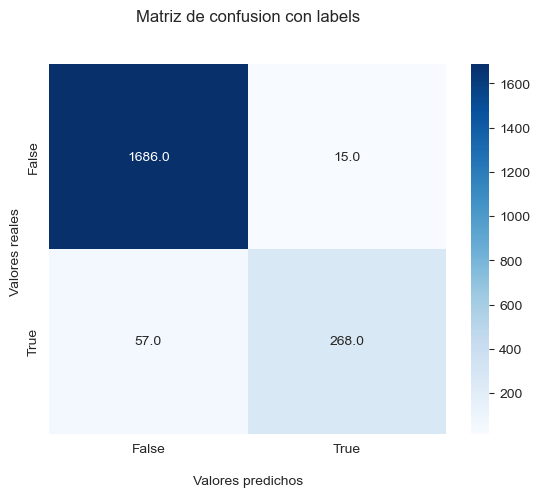

In [109]:
mat_conf(y_test,y_pred_RFC_o)

Matriz de confusion modelo base

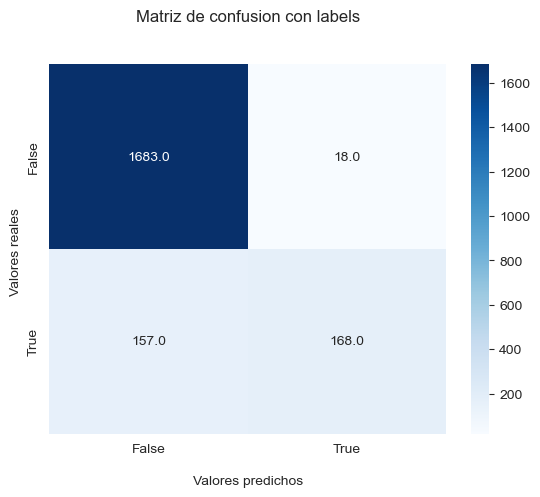

In [110]:
mat_conf(y_test,y_pred_RFC)

Como podemos ver, todas las metricas mejoran considerablemente, y mas aun si prestamos atencion a las predicciones de nuestro target, es decir el 1. 

Mejoran en gran medida todas las metricas.

## CV con hypertuning, evaluado segun ROC_AUC

In [111]:
rfc = RandomForestClassifier(random_state=0,
                             criterion = 'gini')

In [112]:
num_estimators = np.linspace(400, 700, num = 10, endpoint = True).astype(int)
max_depth = range(15,21)
# max_depth = random.sample(range(15, 25), 20)

grid_params = {'n_estimators':num_estimators,
               'max_depth':max_depth}

In [113]:
skf4 = StratifiedKFold(n_splits=3,
                      shuffle=True, 
                      random_state=4)

rfc_rscv = RandomizedSearchCV(rfc,
                              grid_params,
                              cv=skf4,
                              n_jobs=-1,
                              refit=True,
                              scoring='roc_auc',
                              return_train_score=True,
                              n_iter=20,
                              random_state=7,
                              verbose=1)
rfc_rscv.fit(X_train_enc,y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=4, shuffle=True),
                   estimator=RandomForestClassifier(random_state=0), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'max_depth': range(15, 21),
                                        'n_estimators': array([400, 433, 466, 500, 533, 566, 600, 633, 666, 700])},
                   random_state=7, return_train_score=True, scoring='roc_auc',
                   verbose=1)

In [114]:
rfc_rscv.best_estimator_

RandomForestClassifier(max_depth=20, n_estimators=700, random_state=0)

In [115]:
rfc_rscv.best_score_

0.9860979457354571

In [116]:
rfc_rscv.scorer_

make_scorer(roc_auc_score, needs_threshold=True)

In [117]:
pd.DataFrame(rfc_rscv.cv_results_).sort_values('rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
2,10.663074,0.156864,0.356414,0.009743,700,20,"{'n_estimators': 700, 'max_depth': 20}",0.984275,0.982731,0.991288,0.986098,0.003724,1,1.0,1.0,1.0,1.0,6.409876e-17
9,6.202734,0.179187,0.227051,0.017209,400,18,"{'n_estimators': 400, 'max_depth': 18}",0.984016,0.982981,0.991262,0.986086,0.003684,2,1.0,1.0,1.0,1.0,0.000000e+00
11,8.817325,0.183473,0.298734,0.008382,566,19,"{'n_estimators': 566, 'max_depth': 19}",0.984008,0.982788,0.991434,0.986077,0.003821,3,1.0,1.0,1.0,1.0,0.000000e+00
5,8.346885,0.252352,0.273729,0.004028,533,19,"{'n_estimators': 533, 'max_depth': 19}",0.983893,0.982793,0.991482,0.986056,0.003863,4,1.0,1.0,1.0,1.0,0.000000e+00
16,7.187290,0.212378,0.273395,0.028165,466,18,"{'n_estimators': 466, 'max_depth': 18}",0.983898,0.982977,0.991293,0.986056,0.003722,5,1.0,1.0,1.0,1.0,0.000000e+00


In [118]:
rfc_optimizado2 = RandomForestClassifier(random_state=0,
                             criterion = 'gini',
                             max_depth=20,
                             n_estimators=700)
rfc_optimizado2.fit(X_train_enc,y_train)
y_pred = rfc_optimizado2.predict(X_test_enc)

--IMPORTANTE--

En el caso de una clasificacion binaria, las metricas arrojan valores para el target = 1. Es importante que al transformar nuestros datos tengamos esta consideracion.



In [119]:
roc_auc_score(y_test,y_pred)

0.9063600596933931

In [120]:
recall_score(y_test,y_pred)

0.8215384615384616

In [121]:
y_pred_train = rfc_optimizado2.predict(X_train_enc)

In [122]:
print(classification_report(y_test,y_pred))
print(f'roc_auc: {roc_auc_score(y_test,y_pred)}')

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1701
           1       0.95      0.82      0.88       325

    accuracy                           0.96      2026
   macro avg       0.96      0.91      0.93      2026
weighted avg       0.96      0.96      0.96      2026

roc_auc: 0.9063600596933931


El resultado es muy parecido al que arroja si no le asignamos un scoring de roc_auc.

Las metricas son muy buenas, vamos a hacer una validacion cruzada con un StratifiedKFold para ver si hay overfiting 

In [123]:
skf_rfc = StratifiedKFold(n_splits = 10)

cv_rfc = cross_validate(rfc,
                             X_train_enc,
                             y_train,
                             scoring = ['roc_auc','recall'],
                             return_train_score=True,
                             cv = skf_rfc)


In [124]:
pd.DataFrame(cv_rfc)

,fit_time,score_time,test_roc_auc,train_roc_auc,test_recall,train_recall
0,1.491347,0.048012,0.989655,1.0,0.816794,1.0
1,1.466322,0.046011,0.989344,1.0,0.838462,1.0
2,1.515351,0.046001,0.987687,1.0,0.769231,1.0
3,1.490327,0.045020,0.990769,1.0,0.823077,1.0
4,1.467216,0.045000,0.979632,1.0,0.761538,1.0
5,1.477334,0.044010,0.991748,1.0,0.807692,1.0
6,1.503340,0.047010,0.987008,1.0,0.815385,1.0
7,1.520479,0.046875,0.986968,1.0,0.807692,1.0
8,1.499339,0.045011,0.975221,1.0,0.815385,1.0
9,1.468331,0.044021,0.990736,1.0,0.801527,1.0


In [125]:
resultados_train_scores_cv(cv_rfc,'test')

,0,1,2,3,4,5,6,7,8,9,mean,max,min,std
test_roc_auc,0.990,0.989,0.988,0.991,0.980,0.992,0.987,0.987,0.975,0.991,0.987,0.992,0.975,0.006
test_recall,0.817,0.838,0.769,0.823,0.762,0.808,0.815,0.808,0.815,0.802,0.806,0.838,0.762,0.025


In [126]:
resultados_train_scores_cv(cv_rfc,'train')

,0,1,2,3,4,5,6,7,8,9,mean,max,min,std
train_roc_auc,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
train_recall,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0


En la validacion cruzada, el modelo arroja valores muy altos. Tanto para los train como para los de validacion. 

Podriamos decir por la validacion cruzada que no existe un overfiting pero a su vez, los valores arrojados sobre el conjunto test de los datos en esta CV es mayor a las metricas obtenidas en el modelo con mi conjunto test.

## KNeighborsClassifier hypertuning

Vamos a usar los conjutnos X_tr_sKB y X_ts_sKB. Con los que, ademas de una reduccion de dimensionalidad, se obtuvo un mejor desempeño del modelo. Esto es lo que se hizo y puede verse en el apartado correspondiente


```
# selector = SelectKBest(score_func=f_classif, k=7)
X_tr_sKB = selector.fit_transform(X_train_enc, y_train)
X_ts_sKB = selector.transform(X_test_enc)
```



In [127]:
knn = KNeighborsClassifier()

In [128]:
n_neighbors = np.linspace(1, 50, num = 10, endpoint = True).astype(int)
weights = ['uniform','distance']
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
leaf_size = np.linspace(10, 100, num = 10, endpoint = True).astype(int)


grid_params = {'n_neighbors':n_neighbors,
               'weights':weights,
               'algorithm':algorithm,
               'leaf_size':leaf_size}

In [129]:
skf4 = StratifiedKFold(n_splits=3,
                      shuffle=True, 
                      random_state=4)

knn_rscv = RandomizedSearchCV(knn,
                              grid_params,
                              cv=skf4,
                              n_jobs=-1,
                              refit=True,
                              scoring='roc_auc',
                              return_train_score=True,
                              n_iter=20,
                              random_state=7,
                              verbose=1)
knn_rscv.fit(X_tr_sKB ,y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=4, shuffle=True),
                   estimator=KNeighborsClassifier(), n_iter=20, n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100]),
                                        'n_neighbors': array([ 1,  6, 11, 17, 22, 28, 33, 39, 44, 50]),
                                        'weights': ['uniform', 'distance']},
                   random_state=7, return_train_score=True, scoring='roc_auc',
                   verbose=1)

In [130]:
knn_rscv.best_estimator_

KNeighborsClassifier(algorithm='ball_tree', leaf_size=40, n_neighbors=44,
                     weights='distance')

In [131]:
knn_rscv.best_score_

0.9262072131762648

In [132]:
knn_rscv.scorer_

make_scorer(roc_auc_score, needs_threshold=True)

In [133]:
pd.DataFrame(knn_rscv.cv_results_).sort_values('rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_weights,param_n_neighbors,param_leaf_size,param_algorithm,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
19,0.010002,1.633653e-03,0.067016,0.003560,distance,44,40,ball_tree,"{'weights': 'distance', 'n_neighbors': 44, 'le...",0.921015,0.920945,0.936662,0.926207,0.007393,1,1.0,1.0,1.0,1.0,0.0
1,0.002333,4.701903e-04,0.918874,0.095605,distance,50,100,brute,"{'weights': 'distance', 'n_neighbors': 50, 'le...",0.920922,0.920544,0.937004,0.926157,0.007672,2,1.0,1.0,1.0,1.0,0.0
10,0.023339,1.957203e-02,0.057346,0.009674,distance,28,40,ball_tree,"{'weights': 'distance', 'n_neighbors': 28, 'le...",0.919403,0.917785,0.934130,0.923772,0.007354,3,1.0,1.0,1.0,1.0,0.0
12,0.002001,4.052337e-07,0.275062,0.110817,distance,28,70,brute,"{'weights': 'distance', 'n_neighbors': 28, 'le...",0.919403,0.917785,0.934130,0.923772,0.007354,3,1.0,1.0,1.0,1.0,0.0
6,0.008002,5.150430e-07,0.111358,0.004923,distance,22,100,ball_tree,"{'weights': 'distance', 'n_neighbors': 22, 'le...",0.917129,0.915411,0.933872,0.922137,0.008327,5,1.0,1.0,1.0,1.0,0.0


In [134]:
knn_optimizado2 = KNeighborsClassifier(algorithm='ball_tree', 
                                      leaf_size=40, 
                                      n_neighbors=44,
                                      weights='distance')
knn_optimizado2.fit(X_tr_sKB ,y_train)
y_pred_knn_o = knn_optimizado2.predict(X_ts_sKB )

In [135]:
roc_auc_score(y_test,y_pred_knn_o)

0.8102808302808303

In [136]:
recall_score(y_test,y_pred_knn_o)

0.6523076923076923

In [137]:
print('Resultados KNeighborsClassifier optimizado')
print(classification_report(y_test, y_pred_knn_o,zero_division=0))
print(f'roc_auc : {roc_auc_score(y_test,y_pred_knn_o)}')
print('- '*27)
print('Resultados KNeighborsClassifier modelo base')
print(classification_report(y_test, predicciones_knn,zero_division=0))
print(f'roc_auc : {roc_auc_score(y_test,predicciones_knn)}')

Resultados KNeighborsClassifier optimizado
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1701
           1       0.80      0.65      0.72       325

    accuracy                           0.92      2026
   macro avg       0.87      0.81      0.83      2026
weighted avg       0.91      0.92      0.91      2026

roc_auc : 0.8102808302808303
- - - - - - - - - - - - - - - - - - - - - - - - - - - 
Resultados KNeighborsClassifier modelo base
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1701
           1       0.74      0.56      0.64       325

    accuracy                           0.90      2026
   macro avg       0.83      0.76      0.79      2026
weighted avg       0.89      0.90      0.89      2026

roc_auc : 0.7608935920047032


Con el modelo base tenemos una pequeña diferencia, pero si comparo las metricas con el modelo que estaba usando el conjunto de test y train que habia sido pasado por el metodo de featureSelections SelectKBest el resultado no mejora nada.

## XGBOOST hypertuning

In [147]:
import xgboost as xgb

In [148]:
prueba_xgb = xgb.XGBClassifier(learning_rate=0.001,
                               random_state = 7)
prueba_xgb.fit(X_train_enc,y_train)
y_pred_xgb = prueba_xgb.predict(X_test_enc)

In [149]:
roc_auc_score(y_test,y_pred_xgb)

0.8972477728033283

Ahora vamos a hacer un randomizedSearchCV para encontrar los mejores parametros

In [150]:
params_grid = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [5,6,7]
        }

In [151]:
skf4 = StratifiedKFold(n_splits=5)

In [152]:
grid_cv = RandomizedSearchCV(prueba_xgb,
                             params_grid,
                             scoring='roc_auc',
                             n_jobs = -1,
                             cv=skf4,
                             return_train_score=True)
grid_cv.fit(X_train_enc,y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           impor...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=7, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.5, 1, 1.5, 2, 5],
                                        'max_depth': [5, 6, 7],
                                        'min_child_weight': [1, 5, 10],
                                        'subsample': [0.6, 0.8, 1.0]},
                   return_train_score=True, scoring='roc_auc')

In [153]:
grid_cv.best_score_

0.9849777616610919

In [154]:
pd.DataFrame(grid_cv.cv_results_).sort_values('rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_min_child_weight,param_max_depth,param_gamma,param_colsample_bytree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
2,2.827838,0.561700,0.009202,0.000980,0.8,1,7,0.5,0.6,"{'subsample': 0.8, 'min_child_weight': 1, 'max...",0.984745,0.986305,0.982486,0.988128,0.983225,0.984978,0.002050,1,0.993263,0.993807,0.994920,0.994741,0.994636,0.994274,0.000634
9,2.085271,0.056537,0.011202,0.005493,0.8,1,7,0.5,0.8,"{'subsample': 0.8, 'min_child_weight': 1, 'max...",0.982374,0.982788,0.978947,0.985806,0.980526,0.982088,0.002311,2,0.992896,0.992802,0.993658,0.993521,0.993378,0.993251,0.000341
8,2.039060,0.267102,0.008202,0.000749,0.8,5,6,1,0.6,"{'subsample': 0.8, 'min_child_weight': 5, 'max...",0.980798,0.981991,0.978928,0.984137,0.979089,0.980989,0.001940,3,0.987300,0.988113,0.989921,0.989462,0.989506,0.988860,0.000990
5,2.366535,0.353574,0.008402,0.000800,0.6,5,7,1,0.8,"{'subsample': 0.6, 'min_child_weight': 5, 'max...",0.980370,0.979067,0.976654,0.981216,0.977327,0.978927,0.001736,4,0.987264,0.986495,0.987563,0.986769,0.987341,0.987086,0.000393
0,1.148259,0.093582,0.009603,0.002246,0.6,5,5,1.5,0.6,"{'subsample': 0.6, 'min_child_weight': 5, 'max...",0.976986,0.977271,0.975761,0.980537,0.974717,0.977054,0.001966,5,0.982186,0.983001,0.985014,0.984005,0.984327,0.983706,0.000999


In [155]:
grid_cv.scorer_

make_scorer(roc_auc_score, needs_threshold=True)

In [156]:
grid_cv.best_params_

{'subsample': 0.8,
 'min_child_weight': 1,
 'max_depth': 7,
 'gamma': 0.5,
 'colsample_bytree': 0.6}

Vemos los resultados para el modelo optimizado

In [157]:
xbg_optimizado = xgb.XGBClassifier(learning_rate=0.001,
                                   random_state = 7,
                                   subsample= 0.8,
                                   min_child_weight = 1,
                                   max_depth = 7,
                                   gamma = 1.5,
                                   colsample_bytree = 0.8)
xbg_optimizado.fit(X_train_enc,y_train)
y_xbg = xbg_optimizado.predict(X_test_enc)

In [158]:
print(classification_report(y_test,y_xbg))
print(f'roc_auc: {roc_auc_score(y_test,y_xbg)}')

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1701
           1       0.93      0.79      0.86       325

    accuracy                           0.96      2026
   macro avg       0.95      0.89      0.92      2026
weighted avg       0.96      0.96      0.96      2026

roc_auc: 0.8916320716320717


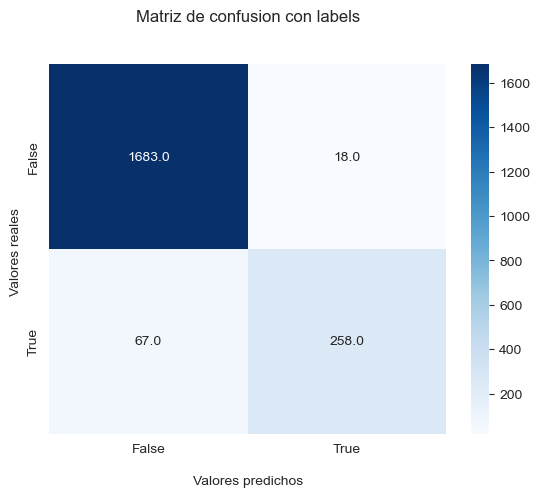

In [159]:
mat_conf(y_test,y_xbg)

Los resultados mejoran muy poco, en el caso del XGBOOSTCLAS.. podemos ver que el cv da valores un tanto mas altos (al rededor de un 0.98) y esto quiere decir que el modelo esta tendiendo a overfitear. Habira que ver como se trabaja esto, para evitar que el modelo aprenda a la perfeccion los datos de train y de esta forma poder predecir la tendencia de datos futuros con mayor certeza. 

## COMPARACION DE MEJORES MODELOS

In [160]:
print('XGBClassifier')
print(classification_report(y_test,y_xbg))
print(f'roc_auc XGBClassifier: {roc_auc_score(y_test,y_xbg)}')
print('- '*27)
print('RandomForestClassifier')
print(classification_report(y_test,y_pred))
print(f'roc_auc RandomForestClassifier: {roc_auc_score(y_test,y_pred_RFC_o)}')
print('- '*27)
print('Resultados KNeighborsClassifier')
print(classification_report(y_test, y_pred_knn_o,zero_division=0))
print(f'roc_auc KNeighborsClassifier: {roc_auc_score(y_test,y_pred_knn_o)}')

XGBClassifier
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1701
           1       0.93      0.79      0.86       325

    accuracy                           0.96      2026
   macro avg       0.95      0.89      0.92      2026
weighted avg       0.96      0.96      0.96      2026

roc_auc XGBClassifier: 0.8916320716320717
- - - - - - - - - - - - - - - - - - - - - - - - - - - 
RandomForestClassifier
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1701
           1       0.95      0.82      0.88       325

    accuracy                           0.96      2026
   macro avg       0.96      0.91      0.93      2026
weighted avg       0.96      0.96      0.96      2026

roc_auc RandomForestClassifier: 0.9078985212318545
- - - - - - - - - - - - - - - - - - - - - - - - - - - 
Resultados KNeighborsClassifier
              precision    recall  f1-score   support

           0       

### Conclusión final

En conclusión, el modelo que se ha desarrollado muestra un alto rendimiento para predecir el resultado binario de una variable objetivo en un conjunto de datos. El puntaje ROC AUC de 0.907 indica que el modelo tiene una gran capacidad para distinguir entre aquellos clientes que abandonaran el servicio y los que no lo haran. 

> EDA

Mediante el análisis exploratorio de datos se pudo sacar algunas conclusiones preeliminares de los datos que fueron analizadas o puestas a prueba durante el desarrollo del proyecto.

El modelo que arrojo un mejor resultado fue un RandomForestClassifier

> Transformaciones

Se utilizo un Pipeline para hacer la transformacion de los conjuntos train y test con el cual fue entrenado y testeado el rendimiento del modelo

In [140]:
preprocess

ColumnTransformer(remainder='passthrough',
                  transformers=[('Cat_ordinales',
                                 Pipeline(steps=[('ord_enc',
                                                  OrdinalEncoder(categories=[['Unknown',
                                                                              'Uneducated',
                                                                              'Graduate',
                                                                              'Post-Graduate',
                                                                              'High '
                                                                              'School',
                                                                              'College',
                                                                              'Doctorate'],
                                                                             ['Unknown',
                                                                              'Less '
                                                                              'than '
                                                                              '$40K',
                                                                              '$40K '
                                                                              '- '
                                                                              '$60K',
                                                                              '$60K '
                                                                              '- '
                                                                              '$80K',
                                                                              '$80K '
                                                                              '- '
                                                                              '$120K',
                                                                              '$120K '
                                                                              '+'],
                                                                             ['Blue',
                                                                              'Silver',
                                                                              'Gold',
                                                                              'Platinum']])),
                                                 ('min_max_scaler',
                                                  MinMaxScaler())]),
                                 ['Education_Level', 'Income_Category',
                                  'Card_Category']),
                                ('Cat_no_ordinales',
                                 Pipeline(steps=[('ohe_enc',
                                                  OneHotEncoder(drop='first'))]),
                                 ['Gender', 'Marital_Status'])])

> Modelo base

Fue necesario crear un modelo base con el cual comparar los diferentes resultados obtenidos mas adelante. Por ello se hicieron 3 modelos diferentes que fueron evaluados segun roc_auc_score

In [141]:
print(f'ROC_AUC para RandomForestClassifier - modelo base -: {round(roc_auc_score(y_test,y_pred_RFC),3)}')

ROC_AUC para RandomForestClassifier - modelo base -: 0.753


> Estandarización

Debido a las transformaciones realizadas por OHE y OrdinalEncoder no fue necesario estandarizar las variables. Esto fue puesto a prueba, evaluando el rendimiento del modelo mediante un set de datos estandarizados segun RobustScaler y StandardScaler.

In [142]:
print(f'ROC_AUC para RandomForestClassifier - variables estandarizadas-: {round(roc_auc_score(y_test,y_pred_RFCstd),3)}')

ROC_AUC para RandomForestClassifier - variables estandarizadas-: 0.761


> Selección de variables

Se utilizaron 3 metodos de feature selection pero ninguno arrojo una mejora significativa en los modelos entrenados. Quiza en un caso con una mayor cantidad de datos podriamos estar dispuestos a sacrificar un poco el rendimiento por reducir la dimensionalidad de nuestro dataset. Este no era el caso.

In [143]:
print(f'ROC_AUC para RandomForestClassifier - PCA-: {round(roc_auc_score(y_test, y_pred_RFCpca),3)}')
print(f'ROC_AUC para RandomForestClassifier - VarianceThreshold-: {round(roc_auc_score(y_test,y_pred_RFCvt),3)}')
print(f'ROC_AUC para RandomForestClassifier - SelectKBest-: {round(roc_auc_score(y_test,y_pred_RFCsKB),3)}')

ROC_AUC para RandomForestClassifier - PCA-: 0.711
ROC_AUC para RandomForestClassifier - VarianceThreshold-: 0.793
ROC_AUC para RandomForestClassifier - SelectKBest-: 0.764


> Validación cruzada y selección de hiperparametros

Se hizo una validacion cruzada con StratifiedKFold en conjunto con un RandomizedSearchCV para lograr obtener los mejores hiperparametros que aumentaran el rendimiento de nuestro modelo.

Los hiperparametros obtenidos fueron los siguientes
```
rfc_rscv.best_estimator_
{'n_estimators': 633, 'max_depth': 28}
```





> RESULTADO MODELO FINAL

Utilizando los hiperparametros obtenidos, el modelo aumento notablemente su rendimiento.

In [144]:
print(f'ROC_AUC para RandomForestClassifier -FINAL-: {round(roc_auc_score(y_test,y_pred_RFC_o),3)}')

ROC_AUC para RandomForestClassifier -FINAL-: 0.908


In [145]:
print('Resultados RandomForestClassifier optimizado')
print(classification_report(y_test, y_pred_RFC_o,zero_division=0))

Resultados RandomForestClassifier optimizado
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1701
           1       0.95      0.82      0.88       325

    accuracy                           0.96      2026
   macro avg       0.96      0.91      0.93      2026
weighted avg       0.96      0.96      0.96      2026



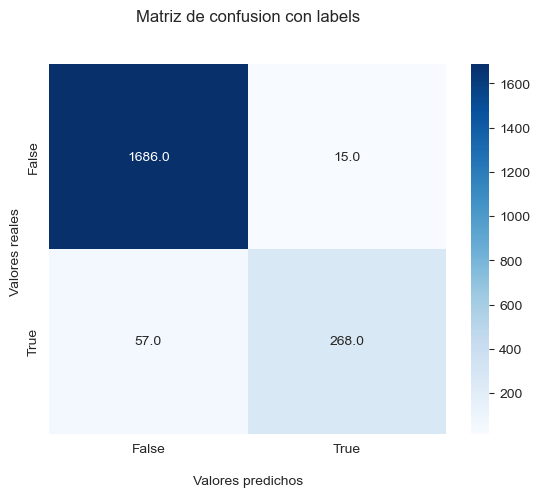

In [146]:
mat_conf(y_test,y_pred_RFC_o)